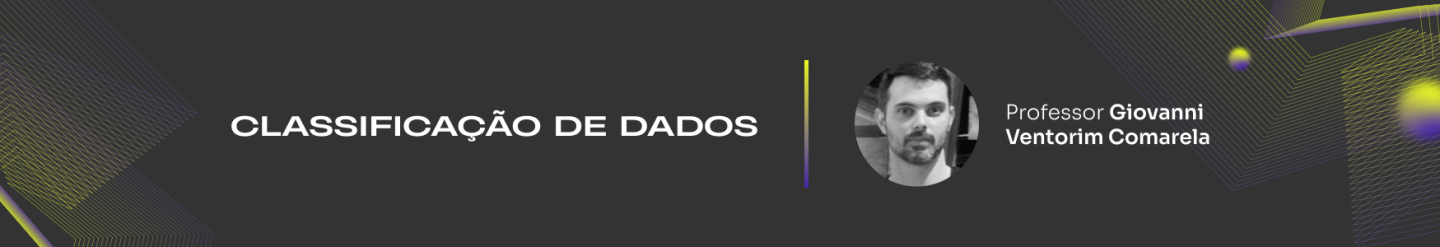

#Florestas Aleatórias

## Nosso problema de interesse

Dados $D = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$, a tarefa de classificação consiste em encontrar um modelo $f$ que aprenda dos vetores de características os rótulos.

Há dois requisitos principais:

1. Se $(\mathbf{x}, y) \in D$, então $f(\mathbf{x}) = y$ com alta probabilidade.

2. A função aprendida deve ser **generalizável**. Se um novo $\mathbf{x}$ não pertencente ao conjunto $D$ for observado, deseja-se também que $f(\mathbf{x})$ seja o rótulo correto de $\mathbf{x}$ com alta probabilidade.

## Revisão da Aula passada



Na aula passada, vimos *Bagging* e *Boosting*. Nesses casos, a ideia básica é combinar classificadores para que, por meio do voto da maioria, um resultado melhor seja obtido.

**Em teoria**, para que essas técnicas garantidamente funcionem, é necessário combinar muitos classificadores **independentes**.

**Na prática**, obter classificadores independentes é uma tarefa difícil. Assim, busca-se por um conjunto de classificadores que **possuam pouca correlação** uns com os outros.

Hoje, vamos ver uma forma diferente de combinar classificadores, as Florestas Aleatórias (ou *Random Forests*).

## Florestas Aleatórias - Intuição



A ideia é muito similar ao uso de *Bagging*.

No entanto, vamos fixar o classificador base como sendo **Árvore de Decisão**.

A Figura abaixo ilustra o objetivo (fonte: [KDnuggets](https://www.kdnuggets.com/2017/10/random-forests-explained.html))

Uma Floresta Aleatória é uma coleção de várias Árvores de Decisão. Para se classificar um elemento $\mathbf{x}$, é necessário classificar $\mathbf{x}$ com todas as Árvores da coleção. Após isso, a classe resultante será aquela formada pelo voto da maioria.

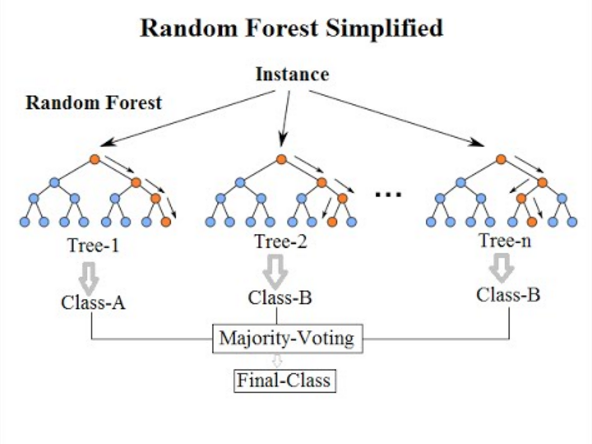

O principal desafio para se criar uma boa Floresta Aleatória é conseguir várias Árvores de Decisão com pouca correlação.

Para isso, além da amostragem com reposição (advinda de *Bagging*), vamos adicionar uma segunda fonte de aleatoriedade no processo de formação das Árvores.

## Florestas Aleatórias - Treinamento

### Entrada

1. Um conjunto de treinamento $D = \{(\mathbf{x}_i, y_i)\}_{i=1}^n$. Cada $\mathbf{x}_i$ pertence ao $\mathbb{R}^d$ (i.e., a matriz de dados possui $d$ características)
2. Um inteiro $K$ (o número de árvores desejadas)

### Algoritmo

1. $K$ novos conjuntos de dados são formados utilizando a mesma estratégia que *Bagging*. Denote os novos conjuntos de treinamento por $D_1, \dots, D_K$

2. Uma árvore de decisão é treinada em cada conjunto $D_i$. No entanto, o processo de geração das árvores é ligeiramente modificado. Para cada teste (nó interno), um conjunto aleatório de $L$ características é considerado. Geralmente, usa-se $L = \sqrt{d}$. No entanto, $L$ é um hiperparâmetro que pode ser escolhido via validação cruzada.

## Florestas Aleatórias na ``scikit-learn``

A biblioteca ``scikit-learn`` possui um módulo para [Florestas Aleatórias](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Vamos ver o funcionamento por meio de um exemplo.

### Exemplo I

In [ ]:
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y = True, as_frame = True)
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Realizando a divisão do conjunto de dados em subconjuntos de treinamento e teste.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Treinando o Classificador com os dados do conjunto de treinamento. Veja que os hiperparâmetros foram mantidos como no padrão da ``scikit-learn``.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train);

Obtendo as classes dos elementos no conjunto de teste.

In [ ]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.97      0.99      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



Observe que resultados de boa qualidade foram obtidos mesmo sem realizar:
- Pré-processamento no conjunto de dados;
- Busca por hiperparâmetros.

### Exemplo II

Como um outro exemplo, vamos utilizar o conjunto de dados referente à tarefa de reconhecimento de dígitos.

In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets

X, y = datasets.load_digits(return_X_y = True, as_frame = True)
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


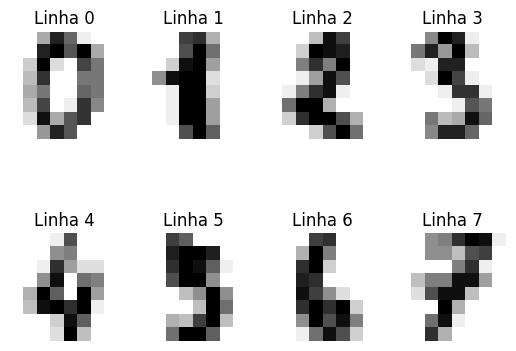

In [ ]:
#@title Representação em imagens das linhas de $\mathbf{X}$
digits = datasets.load_digits(return_X_y = False, as_frame = True)
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Linha %i' % index)

Dividindo os dados em subconjuntos de treinamento e teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Realizando o treinamento de uma Floresta Aleatória e realizando busca de hiperparâmetros com validação cruzada de 5 *folds*.

Os seguintes hiperâmetros foram inspecionados:
- ``n_estimators``: número de árvores na floresta
- ``max_depth``: profundidade máxima de cada árvore da floresta
- ``max_features``: tamanho da amostra aleatória de características para o processo de divisão de cada nó de cada árvore de decisão
- ``max_samples``: tamanho da amostra (relativo ao tamanho do conjunto de treinamento) para treinar cada Árvore de Decisão da Floresta.

**Observação:** há vários outros hiperparâmetros que podem ser configurados. Uma lista completa está disponível na [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) da ``scikit-learn``.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 1000],
          'max_depth': [2, 4, 6, 8],
          'max_features': ['sqrt', 'log2', 1.0],
          'max_samples': [0.2, 0.6, 1.0]}

grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid = params, cv = 5, n_jobs = -1, verbose = 9)

grid_search.fit(X_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits


Classificando os elementos do conjunto de teste e avaliando o classificador treinado.

In [ ]:
y_pred = grid_search.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        46
           4       0.98      1.00      0.99        55
           5       0.97      0.97      0.97        59
           6       0.98      0.98      0.98        45
           7       0.95      1.00      0.98        41
           8       0.95      0.95      0.95        38
           9       0.98      0.94      0.96        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Inspecionando os melhores hiperparâmetros escolhidos.

In [ ]:
grid_search.best_params_

{'max_depth': 8,
 'max_features': 'log2',
 'max_samples': 1.0,
 'n_estimators': 100}

## Referências

1. Artigo Científico **Random Forests** disponível [aqui](https://link.springer.com/article/10.1023/A:1010933404324).